In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st

In [12]:
path = '..\exported excels'

excel_files = [f for f in os.listdir(path)]
excel_files

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\aravi\AppData\Local\Temp\ipykernel_24644\3540734364.py:1: SyntaxWarning: invalid escape sequence '\e'
  path = '..\exported excels'


['commodities 2020-21.xlsx',
 'commodities 2021-22.xlsx',
 'commodities 2022-23.xlsx',
 'commodities 2023-24.xlsx',
 'commodities 2024-25.xlsx']

In [13]:
# merging files
merged_df = None

for file in excel_files:
    common_cols = ['S.No.','HSCode','Commodity']

    file_path = os.path.join(path,file)
    df = pd.read_excel(file_path)

    suffix = file.split(" ")[1].strip('.xlsx')

    df = df.rename(columns={col : f'{col}-{suffix}' for col in df.columns if col == '% Growth'})

    if merged_df is None :
        merged_df = df
    else :
        merged_df = pd.merge(merged_df,df,on= common_cols,how='outer')    

In [15]:
# removing repeated columns
repeated_cols = []
for col in merged_df.columns :
    col_names = col.split(' ')
    if ''.join(col_names) not in repeated_cols:
        repeated_cols.append(''.join(col_names))
    else :
        merged_df.drop(col,axis=1,inplace=True)

merged_df
rearrange_cols = ['S.No.','HSCode','Commodity','Apr-2020 (R)','Apr - 2021 (R)','Apr - 2022 (R)','Apr - 2023 (R)','Apr - 2024 (F)','Apr - 2025 (F)','% Growth-2020-21','% Growth-2021-22','% Growth-2022-23','% Growth-2023-24','% Growth-2024-25']
merged_df = merged_df[rearrange_cols]


In [16]:
# removing (R) and (F) in columns
merged_df.columns = [col.replace('(R)', '').replace('(F)', '').replace(' ','').replace('Apr','April').strip() for col in merged_df.columns]
merged_df=merged_df.astype({'S.No.':'Int64','HSCode':'Int64'})
merged_df


,S.No.,HSCode,Commodity,April-2020,April-2021,April-2022,April-2023,April-2024,April-2025,%Growth-2020-21,%Growth-2021-22,%Growth-2022-23,%Growth-2023-24,%Growth-2024-25
0,1,1,LIVE ANIMALS.,0.43,0.53,0.77,1.03,1.97,1.54,24.07,44.70,33.64,90.83,-21.49
1,2,2,MEAT AND EDIBLE MEAT OFFAL.,114.91,303.86,307.46,284.49,261.95,287.27,164.42,1.19,-7.47,-7.92,9.67
2,3,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",245.63,491.53,546.10,482.71,424.74,487.90,100.11,11.10,-11.61,-12.01,14.87
3,4,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,20.71,30.53,64.10,47.16,54.42,77.22,47.38,109.99,-26.43,15.40,41.88
4,5,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",2.58,10.89,17.73,25.62,10.99,20.76,321.45,62.87,44.46,-57.09,88.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,96,MISCELLANEOUS MANUFACTURED ARTICLES.,15.53,50.06,71.04,65.94,59.85,62.28,222.38,41.92,-7.18,-9.23,4.06
95,96,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,0.12,2.70,3.55,13.66,6.90,14.98,2207.18,31.43,284.51,-49.48,117.08
96,97,98,PROJECT GOODS; SOME SPECIAL USES.,0.48,0.84,1.19,2.10,1.75,0.65,75.09,42.42,76.36,-16.50,-62.77
97,98,99,MISCELLANEOUS GOODS.,5.12,3.49,3.55,14.04,0.03,0.02,-31.93,1.67,296.00,-99.77,-34.98


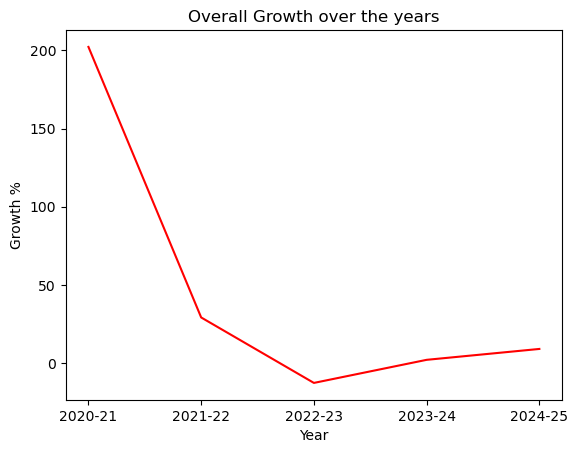

In [19]:
# get growth percentage of each year and plot it in line plot

year = merged_df.iloc[0,9:]
years = [col.replace('%Growth-', '') for col in year.index]
growth_percentage =merged_df.iloc[98,9:].values

plt.plot(years,growth_percentage,color='red')
plt.xlabel('Year')
plt.ylabel('Growth %')
plt.title('Overall Growth over the years')
plt.show()
    

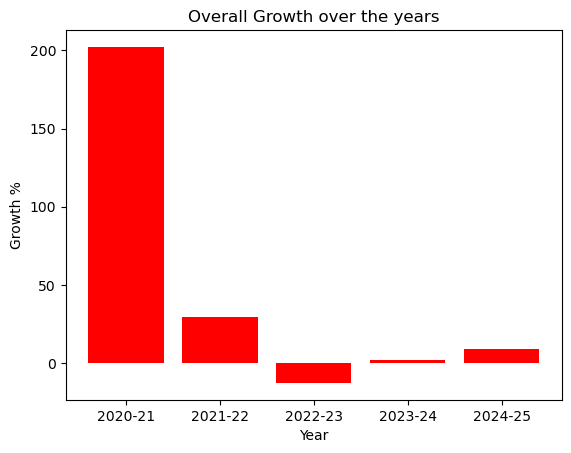

In [21]:
# get growth percentage of each year and plot it in bar plot

year = merged_df.iloc[0,9:]
years = [col.replace('%Growth-', '') for col in year.index]
growth_percentage =merged_df.iloc[98,9:].values

plt.bar(years,growth_percentage,color='red')
plt.xlabel('Year')
plt.ylabel('Growth %')
plt.title('Overall Growth over the years')
plt.show()

These values are above their average:  103.80877551020409


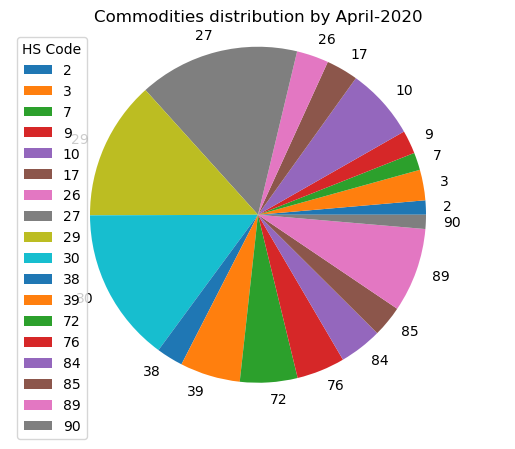

These values are above their average:  313.7819387755102


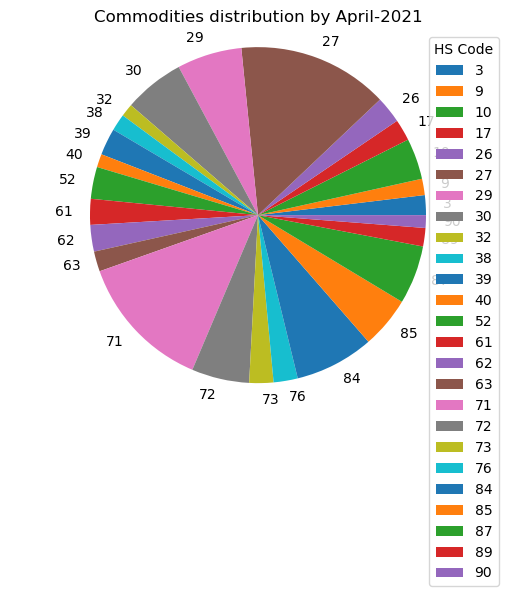

These values are above their average:  405.0832653061224


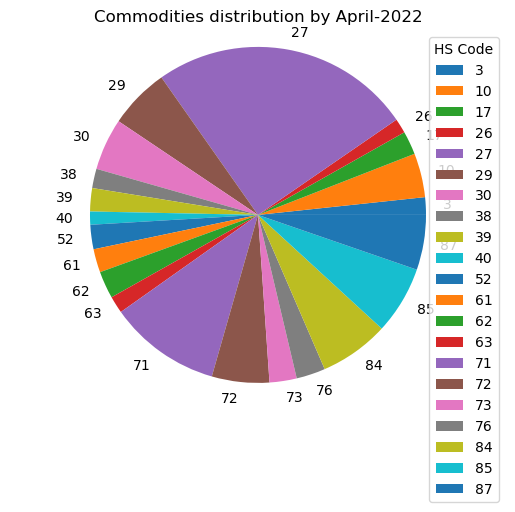

These values are above their average:  353.249693877551


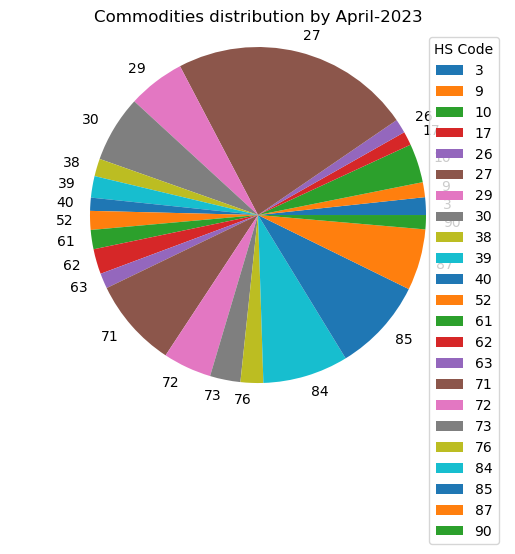

These values are above their average:  360.240306122449


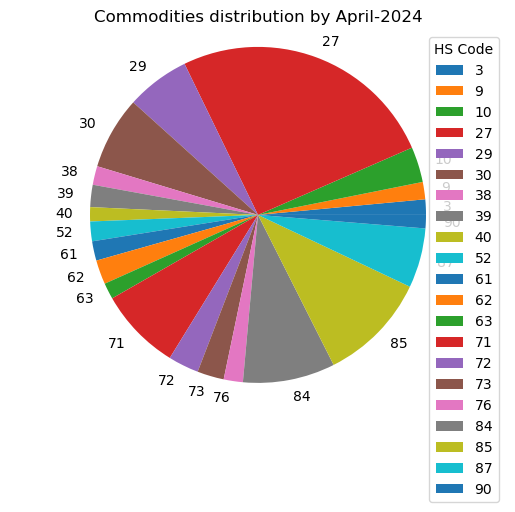

These values are above their average:  392.4685714285714


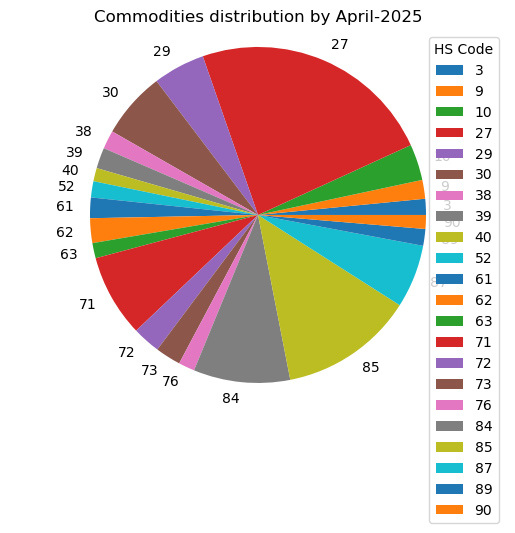

In [22]:
#Pie chart distribution of different years
for i in range(3,9):
    commodities = merged_df.iloc[:98,i]
    hscode = merged_df.iloc[:98,1]
    average = st.mean(commodities)
    commodities_values = [(i,j) for i,j in zip(commodities,hscode) if i>average]


    print("These values are above their average: ",average)
    plt.pie([i[0] for i in commodities_values],labels=[i[1] for i in commodities_values] )
    plt.axis('equal')
    plt.title(f'Commodities distribution by {commodities.name}')
    plt.legend(title='HS Code')
    plt.show()


In [23]:
merged_df.to_csv('commodities.csv',index=False)
merged_df.to_excel('commodities.xlsx',index=False)